## Catchment Area for Deer Island Wastewater Treatment Plant

In [1]:
import geopandas as gp
import shapely 
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
# Open catchment shapefile
c_area = gp.read_file("../data/Deer_Island_catchment_full/Deer_Island_Catchment_full.shp")
c_area.head(5)

,TOWN_ID,TOWN,FIPS_STCO,POP1980,POP1990,POP2000,POP2010,POPCH80_90,POPCH90_00,POPCH00_10,FOURCOLOR,TYPE,ISLAND,SHAPE_AREA,SHAPE_LEN,geometry
0,342,WILMINGTON,25017,17442,17651,21367,22325,209,3716,958,2,T,0,4.442178e+07,31369.102940,"POLYGON ((227497.924 927551.501, 227579.844 92..."
1,48,BURLINGTON,25017,22959,23302,22876,24498,343,-426,1622,4,T,0,3.071246e+07,23368.211376,"POLYGON ((227111.794 918384.061, 227232.224 91..."
2,305,WAKEFIELD,25017,25112,24825,24804,24932,-287,-21,128,2,T,0,2.066149e+07,21647.170934,"POLYGON ((234897.734 920144.061, 235530.574 91..."
3,73,DEDHAM,25021,24399,23782,23464,24729,-617,-318,1265,3,T,0,2.765179e+07,26563.272465,"POLYGON ((225723.704 892264.691, 225741.074 89..."
4,189,MILTON,25021,25696,25725,26062,27003,29,337,941,2,T,0,3.418377e+07,33001.366045,"POLYGON ((235895.594 891221.311, 235902.254 89..."


In [5]:
# open Deer Island WTP location shapefile
di_wtp = gp.read_file("../data/Deer_Island_WTP/mwra_deer_island_WTP.shp")
di_wtp

,SOURCE_ID,EPA_SYSTEM,REGISTRY_I,STATUTE,CWP_NAME,CWP_STREET,CWP_CITY,CWP_STATE,CWP_STATE_,CWP_ZIP,...,FAC_TRI_RE,CWP_CURR_3,CWP_13QTRS,SIC_CODES,NAICS_CODE,CASE_IDS,STATE_WATE,STATE_WA_1,OBJECTID,geometry
0,MA0103284,ICP,110025247720,CWA,MWRA DEER ISLAND TREATMENT PLANT,190 TAFTS AVE,BOSTON,MA,None,02152,...,None,Yes,___VVVVVVVVSV,4952,None,None,01090001,ATLANTIC OCEAN (BOSTON HARBOR),169799,POINT (-7898885.197 5213627.803)


In [6]:
print(c_area.crs)
print(di_wtp.crs)
di_wtp_c_area_crs = di_wtp.to_crs(epsg=26986)
print(di_wtp_c_area_crs.crs)

epsg:26986
epsg:3857
epsg:26986


In [7]:
# point layer for labels
## find centroids for catchment area towns
c_area["center"] = c_area["geometry"].centroid
c_area_points = c_area.copy()
c_area_points.set_geometry("center", inplace = True)

In [ ]:
# To add contextly basemap
# change crs (PROBLEM WITH PROJECTION)
##print(c_area.crs)
##c_area_ctx_crs = c_area.to_crs(epsg=3857) # CRS needs to be epsg=3857 to plot data over contextily basemaps
##print(c_area_ctx_crs.crs)

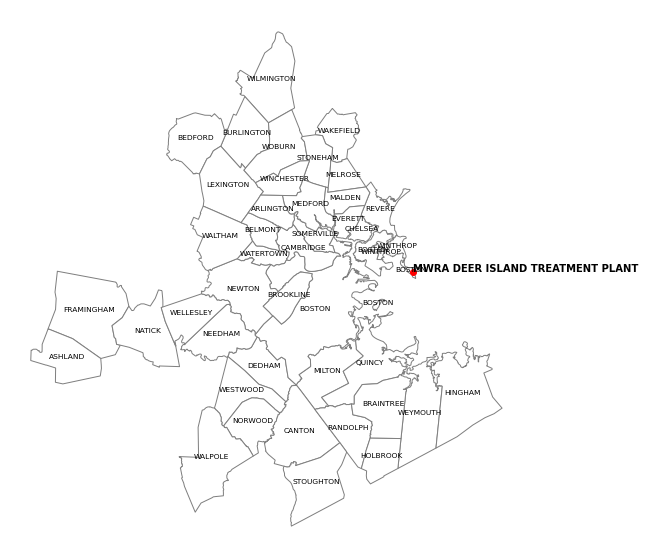

In [8]:
# plot the catchment area map with labels
base = c_area.plot(color='white', edgecolor='grey', figsize=(10,10))
di_wtp_c_area_crs.plot(ax = base, color='red')
base.set_axis_off()
## add labels for counties
texts = []
for x, y, label in zip(c_area_points.geometry.x, c_area_points.geometry.y, c_area_points["TOWN"]):
    texts.append(plt.text(x, y, label, fontsize = 7.5, horizontalalignment='center'))
textsdi = []
for x, y, label in zip(di_wtp_c_area_crs.geometry.x, di_wtp_c_area_crs.geometry.y, di_wtp_c_area_crs["CWP_NAME"]):
    textsdi.append(plt.text(x, y, label, fontsize = 10, weight='bold', horizontalalignment='left'))
plt.show()

## Climate Data from Daymet

In [9]:
import xarray as xr
from pyproj import CRS
import geopandas as gpd
from shapely import geometry

Use xarray to open the dataset at this OPeNDAP endpoint


In [10]:
ds = xr.open_dataset( "https://thredds.daac.ornl.gov/thredds-daymet/dodsC/daymet-v3-agg/na.ncml" )

In [11]:
ds

<xarray.Dataset>
Dimensions:                  (nv: 2, time: 14600, x: 7814, y: 8075)
Coordinates:
  * x                        (x) float32 -4560250.0 -4559250.0 ... 3252750.0
  * y                        (y) float32 4984000.0 4983000.0 ... -3090000.0
  * time                     (time) datetime64[ns] 1980-01-01 ... 2019-12-31
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
Dimensions without coordinates: nv
Data variables:
    lambert_conformal_conic  int16 ...
    yearday                  (time) int16 ...
    time_bnds                (time, nv) datetime64[ns] ...
    dayl                     (time, y, x) float32 ...
    prcp                     (time, y, x) float32 ...
    srad                     (time, y, x) float32 ...
    swe                      (time, y, x) float32 ...
    tmax                     (time, y, x) float32 ...
    tmin                     (time, y, x) float32 ...
    vp                       (time, y, x) float32 ...
Attributes:
    start_year:        1980
    source:            Daymet Software Version 3.0
    Version_software:  Daymet Software Version 3.0
    Version_data:      Daymet Data Version 3.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...
    title:             Daymet: Daily Surface Weather Data on a 1-km Grid for ...
    institution:       Oak Ridge National Laboratory Distributed Active Archi...
    end_year:          2019

**Subset data by bounding box**

In [12]:
# Specify the region we want to look at with DayMet (lon_min, lat_min, lon_max, lat_max)
# and the coordinate system we are providing the bounding box coordinates in (epsg:4326)
min_long = -71.584168
min_lat = 42.045621
max_long = -70.548706
max_lat = 42.623248
bounding_box = gpd.GeoSeries(geometry.box(min_long, min_lat, max_long, max_lat), 
                             crs='epsg:4326')

In [13]:
# Get the coordinate reference system used by DayMet
daymet_crs = CRS.from_cf(ds.lambert_conformal_conic.attrs)

In [14]:
# Take a look at our bounding box object
bounding_box

0    POLYGON ((-70.54871 42.04562, -70.54871 42.623...
dtype: geometry

In [16]:
# Reproject our bounding box polygon into this new coordinate system (Lambert Conformal Conic)
bounding_box = bounding_box.to_crs(daymet_crs)

In [17]:
# Now we can get our bounds out in Daymet's coordinate system using
bounding_box.bounds

# These can be accessed indiviudally as for example:
# bounding_box.bounds.minx[0]
# where [0] cooresponds to our first and only row

,minx,miny,maxx,maxy
0,2.180088e+06,330351.71536,2.277419e+06,415557.400409


In [18]:
# Select this region from our DayMet Dataset
boston_area_clim = ds.sel(x = slice(bounding_box.bounds.minx[0], bounding_box.bounds.maxx[0]), # Here we are slicing the x axis with slice(minx, maxx)
                   y = slice(bounding_box.bounds.maxy[0], bounding_box.bounds.miny[0])) # Note that we are slicing the *inverted* y axis with slice(maxy,miny)

# Look at what we selected from DayMet
boston_area_clim

<xarray.Dataset>
Dimensions:                  (nv: 2, time: 14600, x: 97, y: 85)
Coordinates:
  * x                        (x) float32 2180750.0 2181750.0 ... 2276750.0
  * y                        (y) float32 415000.0 414000.0 ... 332000.0 331000.0
  * time                     (time) datetime64[ns] 1980-01-01 ... 2019-12-31
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
Dimensions without coordinates: nv
Data variables:
    lambert_conformal_conic  int16 -32767
    yearday                  (time) int16 0 1 2 3 4 5 ... 360 361 362 363 364
    time_bnds                (time, nv) datetime64[ns] 1980-01-01 ... 2020-01-01
    dayl                     (time, y, x) float32 ...
    prcp                     (time, y, x) float32 ...
    srad                     (time, y, x) float32 ...
    swe                      (time, y, x) float32 ...
    tmax                     (time, y, x) float32 ...
    tmin                     (time, y, x) float32 ...
    vp                       (time, y, x) float32 ...
Attributes:
    start_year:        1980
    source:            Daymet Software Version 3.0
    Version_software:  Daymet Software Version 3.0
    Version_data:      Daymet Data Version 3.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...
    title:             Daymet: Daily Surface Weather Data on a 1-km Grid for ...
    institution:       Oak Ridge National Laboratory Distributed Active Archi...
    end_year:          2019

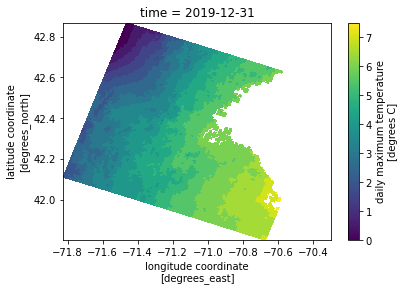

In [19]:
# check the plot of extracted climate data points on catchment area map
boston_area_clim.tmax.isel(time=-1).plot(x='lon', y='lat')

NameError: name 'c_area_daymet_cars' is not defined

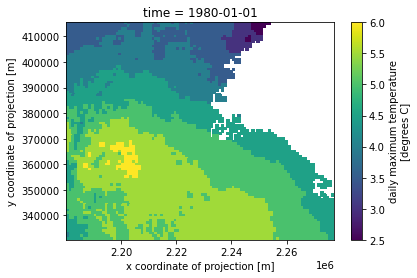

In [21]:
# overlay atchment area on climate data 
## reproject the catchment area layer
c_area_daymet_crs= c_area.to_crs(daymet_crs)
base = boston_area_clim.tmax.isel(time=0).plot()
c_area_daymet_cars.plot(ax = base, color='black')
plt.show()

Data for Deer Island WTP plant point

In [25]:
# Define a point with Longitude and Latitude (EPSG:4326)
di_wtp_point_lon_lat = gpd.GeoSeries(geometry.Point(-70.960994, 42.352173),
                                 crs='epsg:4326')

# Convert to the DayMet coordinate reference system as we did previously with our bounding box
di_wtp_point = di_wtp_point_lon_lat.to_crs(daymet_crs)
di_wtp_point

0    POINT (2235768.144 377489.291)
dtype: geometry

In [28]:
# Select from DayMet prcp a time slice and an x and y point using the 'nearest' method
di_wtp_point_prcp = boston_area_clim.prcp.sel(time=slice('1-2020','9-2020')).sel(x=di_wtp_point.x[0], y=di_wtp_point.y[0], method='nearest')
di_wtp_point_prcp

<xarray.DataArray 'prcp' (time: 0)>
array([], dtype=float32)
Coordinates:
    x        float32 2235750.0
    y        float32 377000.0
  * time     (time) datetime64[ns] 
    lat      float32 42.34789
    lon      float32 -70.96333
Attributes:
    long_name:     daily total precipitation
    units:         mm/day
    grid_mapping:  lambert_conformal_conic
    cell_methods:  area: mean time: sum

No values in the output because Daymet data is only available till 2019

**Generate time series**

How to aggregade data at community level. Just take mean temperature?

## Stream Flow Data from NWM

In [ ]:
!pip install nwm

Available COMID ID nearest to Deer Island WTP : 5868233 

In [32]:
from nwm import NwmHs

# download streamflow data
nwm_data = NwmHs()
flow_data = nwm_data.get_data(archive='rolling', config='short_range', geom='channel_rt',
                            variable='streamflow', comid=[5868233], init_time=0, # change comid [] as per our selected location
                            start_date='2020-08-10') # change date as per our analysis

In [30]:
flow_data

<xarray.DataArray (time: 18)>
array([131.0175, 131.0175, 130.6644, 130.6644, 130.3112, 130.3112,
       129.9581, 129.9581, 129.6049, 129.6049, 129.6049, 129.2518,
       129.2518, 129.2518, 129.2518, 129.2518, 128.8987, 128.8987])
Coordinates:
  * time     (time) datetime64[ns] 2020-08-10T01:00:00 ... 2020-08-10T18:00:00
Attributes:
    site_name:           COMID: 5868233; Short Range, Channel (streamflow).
    variable_name:       Flow Forecast
    variable_unit_name:  Flow
    variable_unit:       cfs
    value_type:          Derived Value
    no_data_value:       -9999
    archive:             rolling